🏨 **Inventory Forecasting & Reorder Recommendation System for Hotel Bars**

🎯 **Problem Statement**

The hotel chain is experiencing frequent stockouts of popular items and overstocking of slow-moving ones across its bars. These issues lead to:

Increased operational costs (waste, storage)

Poor guest satisfaction (items unavailable)

📦 **Business Goal**

To build an intelligent system that can:

Forecast daily consumption of each item at each bar

Calculate par levels to maintain for optimal stock

Recommend reorder quantities to avoid stockouts and overstocking



In [ ]:
#import the pandas librabry for the data manipulation
import pandas as pd 

In [177]:
# read the data 
df=pd.read_excel(r"C:\Users\bittu\Downloads\Consumption Dataset.xlsx")

In [179]:
#view the data 
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.00,4379.88
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.00,1344.37
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.00,1034.28
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.00,2194.53
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2467.08,0.00,321.06,2146.02
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,0.00,1743.64,175.05,1568.59
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4192.66,0.00,197.60,3995.06
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2424.95,0.00,128.52,2296.43


In [181]:
#set the decimal format 
pd.set_option('display.float_format', '{:.2f}'.format)


In [183]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.00,4379.88
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.00,1344.37
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.00,1034.28
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.00,2194.53
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2467.08,0.00,321.06,2146.02
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,0.00,1743.64,175.05,1568.59
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4192.66,0.00,197.60,3995.06
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2424.95,0.00,128.52,2296.43


In [185]:
#check the data types and the qualitiy
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date Time Served      6575 non-null   datetime64[ns]
 1   Bar Name              6575 non-null   object        
 2   Alcohol Type          6575 non-null   object        
 3   Brand Name            6575 non-null   object        
 4   Opening Balance (ml)  6575 non-null   float64       
 5   Purchase (ml)         6575 non-null   float64       
 6   Consumed (ml)         6575 non-null   float64       
 7   Closing Balance (ml)  6575 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 411.1+ KB


In [187]:
# rest the index for comfort 
df.index = df.index + 1

In [191]:
df


,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
1,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.00,4379.88
2,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.00,1344.37
3,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.00,1034.28
4,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.00,2194.53
5,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6571,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2467.08,0.00,321.06,2146.02
6572,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,0.00,1743.64,175.05,1568.59
6573,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4192.66,0.00,197.60,3995.06
6574,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2424.95,0.00,128.52,2296.43


In [193]:
#recalculating the consumed alcohol for data quality checking 
df["Consumed (ml) (recalc)"] = (
        df["Opening Balance (ml)"] +
        df["Purchase (ml)"] -
        df["Closing Balance (ml)"])

In [195]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Consumed (ml) (recalc)
1,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.00,4379.88,0.00
2,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.00,1344.37,0.00
3,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.00,1034.28,0.00
4,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.00,2194.53,0.00
5,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.00,1020.90,0.00
...,...,...,...,...,...,...,...,...,...
6571,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2467.08,0.00,321.06,2146.02,321.06
6572,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,0.00,1743.64,175.05,1568.59,175.05
6573,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4192.66,0.00,197.60,3995.06,197.60
6574,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2424.95,0.00,128.52,2296.43,128.52


In [197]:
#checking the diff bw calculated data and the actual data
df["Consumed_diff"] = df["Consumed (ml) (recalc)"] - df["Consumed (ml)"]


In [199]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Consumed (ml) (recalc),Consumed_diff
1,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.00,4379.88,0.00,0.00
2,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.00,1344.37,0.00,0.00
3,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.00,1034.28,0.00,0.00
4,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.00,2194.53,0.00,0.00
5,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.00,1020.90,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
6571,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2467.08,0.00,321.06,2146.02,321.06,-0.00
6572,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,0.00,1743.64,175.05,1568.59,175.05,0.00
6573,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4192.66,0.00,197.60,3995.06,197.60,-0.00
6574,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2424.95,0.00,128.52,2296.43,128.52,-0.00


In [201]:
print("\n First few rows with recalculated values:")
print(df[[
    "Date Time Served", "Bar Name", "Brand Name",
    "Opening Balance (ml)", "Purchase (ml)",
    "Consumed (ml)", "Consumed (ml) (recalc)", "Consumed_diff"
]].head())


 First few rows with recalculated values:
     Date Time Served       Bar Name      Brand Name  Opening Balance (ml)  \
1 2023-01-01 19:35:00    Smith's Bar  Captain Morgan               2555.04   
2 2023-01-01 10:07:00    Smith's Bar     Yellow Tail               1344.37   
3 2023-01-01 11:26:00  Johnson's Bar      Grey Goose               1034.28   
4 2023-01-01 13:53:00  Johnson's Bar           Coors               2194.53   
5 2023-01-01 22:28:00  Johnson's Bar     Yellow Tail               1020.90   

   Purchase (ml)  Consumed (ml)  Consumed (ml) (recalc)  Consumed_diff  
1        1824.84           0.00                    0.00           0.00  
2           0.00           0.00                    0.00           0.00  
3           0.00           0.00                    0.00           0.00  
4           0.00           0.00                    0.00           0.00  
5           0.00           0.00                    0.00           0.00  


In [203]:
#feature Selection
cols = ["Date Time Served", "Bar Name", "Brand Name", "Consumed (ml) (recalc)"]
agg_df = df[cols].copy()

In [205]:
agg_df

,Date Time Served,Bar Name,Brand Name,Consumed (ml) (recalc)
1,2023-01-01 19:35:00,Smith's Bar,Captain Morgan,0.00
2,2023-01-01 10:07:00,Smith's Bar,Yellow Tail,0.00
3,2023-01-01 11:26:00,Johnson's Bar,Grey Goose,0.00
4,2023-01-01 13:53:00,Johnson's Bar,Coors,0.00
5,2023-01-01 22:28:00,Johnson's Bar,Yellow Tail,0.00
...,...,...,...,...
6571,2024-01-01 21:03:00,Anderson's Bar,Coors,321.06
6572,2024-01-01 21:15:00,Anderson's Bar,Malibu,175.05
6573,2024-01-01 18:34:00,Anderson's Bar,Jack Daniels,197.60
6574,2024-01-01 22:46:00,Thomas's Bar,Absolut,128.52


In [207]:
#converts the string into date time format in case if its is string .
agg_df["Date"] = pd.to_datetime(agg_df["Date Time Served"]).dt.date


In [209]:
agg_df

,Date Time Served,Bar Name,Brand Name,Consumed (ml) (recalc),Date
1,2023-01-01 19:35:00,Smith's Bar,Captain Morgan,0.00,2023-01-01
2,2023-01-01 10:07:00,Smith's Bar,Yellow Tail,0.00,2023-01-01
3,2023-01-01 11:26:00,Johnson's Bar,Grey Goose,0.00,2023-01-01
4,2023-01-01 13:53:00,Johnson's Bar,Coors,0.00,2023-01-01
5,2023-01-01 22:28:00,Johnson's Bar,Yellow Tail,0.00,2023-01-01
...,...,...,...,...,...
6571,2024-01-01 21:03:00,Anderson's Bar,Coors,321.06,2024-01-01
6572,2024-01-01 21:15:00,Anderson's Bar,Malibu,175.05,2024-01-01
6573,2024-01-01 18:34:00,Anderson's Bar,Jack Daniels,197.60,2024-01-01
6574,2024-01-01 22:46:00,Thomas's Bar,Absolut,128.52,2024-01-01


In [211]:
#calculating the same day same brand alcohol consumption 
daily_consumption = (
    agg_df
      .groupby(["Date", "Bar Name", "Brand Name"], as_index=False)["Consumed (ml) (recalc)"]
      .sum()
      .rename(columns={
          "Bar Name": "Bar",
          "Brand Name": "Brand",
          "Consumed (ml) (recalc)": "Daily_Consumption_ml"
      })
)


In [213]:
daily_consumption

,Date,Bar,Brand,Daily_Consumption_ml
0,2023-01-01,Anderson's Bar,Bacardi,0.00
1,2023-01-01,Anderson's Bar,Jim Beam,0.00
2,2023-01-01,Anderson's Bar,Miller,0.00
3,2023-01-01,Anderson's Bar,Sutter Home,0.00
4,2023-01-01,Brown's Bar,Captain Morgan,0.00
...,...,...,...,...
6570,2024-01-01,Taylor's Bar,Budweiser,558.72
6571,2024-01-01,Taylor's Bar,Captain Morgan,440.76
6572,2024-01-01,Taylor's Bar,Jim Beam,253.33
6573,2024-01-01,Thomas's Bar,Absolut,128.52


In [215]:
print("\n📊 Aggregated daily consumption (first 10 rows):")
print(daily_consumption.head(10))


📊 Aggregated daily consumption (first 10 rows):
         Date             Bar           Brand  Daily_Consumption_ml
0  2023-01-01  Anderson's Bar         Bacardi                  0.00
1  2023-01-01  Anderson's Bar        Jim Beam                  0.00
2  2023-01-01  Anderson's Bar          Miller                  0.00
3  2023-01-01  Anderson's Bar     Sutter Home                  0.00
4  2023-01-01     Brown's Bar  Captain Morgan                  0.00
5  2023-01-01     Brown's Bar      Grey Goose                  0.00
6  2023-01-01     Brown's Bar        Jim Beam                  0.00
7  2023-01-01   Johnson's Bar           Coors                  0.00
8  2023-01-01   Johnson's Bar      Grey Goose                  0.00
9  2023-01-01   Johnson's Bar     Yellow Tail                  0.00


In [217]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


In [219]:
# searching for the top most consumed alcohol from the top most bar
top_item = (
    daily_consumption
    .groupby(['Bar', 'Brand'])['Daily_Consumption_ml']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .iloc[0]  
)

In [221]:
top_item

Bar                     Brown's Bar
Brand                   Yellow Tail
Daily_Consumption_ml       29588.63
Name: 0, dtype: object

In [223]:
selected_bar = top_item['Bar']
selected_brand = top_item['Brand']
print(f"\n🔍 Selected: {selected_bar} - {selected_brand}")


🔍 Selected: Brown's Bar - Yellow Tail


In [225]:
#creating new data set from the existing one for the particular consumed Brand and Bar
item_ts = daily_consumption[
    (daily_consumption['Bar'] == selected_bar) &
    (daily_consumption['Brand'] == selected_brand)
].copy()

In [227]:
item_ts

,Date,Bar,Brand,Daily_Consumption_ml
22,2023-01-02,Brown's Bar,Yellow Tail,535.95
80,2023-01-05,Brown's Bar,Yellow Tail,552.50
361,2023-01-19,Brown's Bar,Yellow Tail,102.22
381,2023-01-20,Brown's Bar,Yellow Tail,420.12
400,2023-01-21,Brown's Bar,Yellow Tail,555.73
...,...,...,...,...
6208,2023-12-12,Brown's Bar,Yellow Tail,422.21
6228,2023-12-13,Brown's Bar,Yellow Tail,1118.28
6248,2023-12-14,Brown's Bar,Yellow Tail,269.05
6513,2023-12-29,Brown's Bar,Yellow Tail,441.83


In [229]:
item_ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 22 to 6529
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  88 non-null     object 
 1   Bar                   88 non-null     object 
 2   Brand                 88 non-null     object 
 3   Daily_Consumption_ml  88 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.4+ KB


In [231]:
#checking null values and converting the data type and imputing the null ones with zero 
item_ts['Date'] = pd.to_datetime(item_ts['Date'])
item_ts = item_ts.set_index('Date').asfreq('D').fillna(0)

In [233]:
#here we imported timeseries model and training and predicting the forecast for next 7 days 
model = ExponentialSmoothing(item_ts['Daily_Consumption_ml'], trend='add', seasonal=None)
fit = model.fit()
forecast = fit.forecast(7)

In [235]:
print(forecast)

2023-12-31   56.45
2024-01-01   53.27
2024-01-02   50.10
2024-01-03   46.92
2024-01-04   43.74
2024-01-05   40.56
2024-01-06   37.39
Freq: D, dtype: float64


C:\Users\bittu\AppData\Local\Temp\ipykernel_7720\800766464.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bittu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


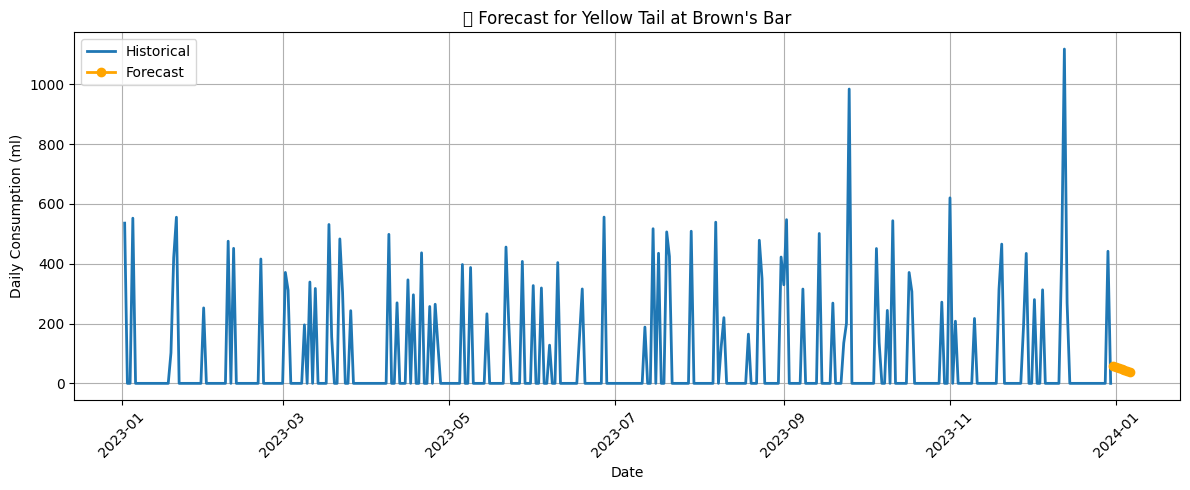

In [237]:
#data visualization 
plt.figure(figsize=(12, 5))

# Plot historical data
plt.plot(item_ts.index, item_ts['Daily_Consumption_ml'], label="Historical", linewidth=2)

# Plot forecast
plt.plot(forecast.index, forecast, label="Forecast", color='orange', marker='o', linewidth=2)

plt.title(f"📈 Forecast for {selected_brand} at {selected_bar}")
plt.xlabel("Date")
plt.ylabel("Daily Consumption (ml)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [239]:
#calculating the average and the par level 
avg_daily_demand = forecast.mean()
lead_time_days = 3
safety_stock = 0.2 * avg_daily_demand
par_level = avg_daily_demand * lead_time_days + safety_stock

In [241]:
# calculating the current stock , reorder needs , reorder quantity .
current_stock = item_ts['Daily_Consumption_ml'][-1] * 2
reorder_needed = current_stock < par_level
reorder_qty = max(par_level - current_stock, 0)

C:\Users\bittu\AppData\Local\Temp\ipykernel_7720\1299597125.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_stock = item_ts['Daily_Consumption_ml'][-1] * 2


In [243]:
print("\n📦 Inventory Recommendation")
print("------------------------------")
print(f"Bar Name           : {selected_bar}")
print(f"Brand Name         : {selected_brand}")
print(f"Avg Forecast (ml/day): {avg_daily_demand:.2f}")
print(f"Par Level (ml)     : {par_level:.2f}")
print(f"Current Stock (ml) : {current_stock:.2f}")
print(f"Reorder Needed     : {'✅ YES' if reorder_needed else '❌ NO'}")
print(f"Quantity to Order  : {reorder_qty:.2f} ml")


📦 Inventory Recommendation
------------------------------
Bar Name           : Brown's Bar
Brand Name         : Yellow Tail
Avg Forecast (ml/day): 46.92
Par Level (ml)     : 150.14
Current Stock (ml) : 0.00
Reorder Needed     : ✅ YES
Quantity to Order  : 150.14 ml
